# PHYS 576 HW 1
### Joshua LaBounty
### 10/3/2018

This notebook will be used to complete the assignment detailed here: https://canvas.uw.edu/courses/1224622/assignments/4408632

In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

%matplotlib inline

Welcome to JupyROOT 6.12/06


I'm not sure if this is going to be the dataset that I'm planning on using for this class, but at the very least it will be highly related. One issue with the assignment is that due to the nature of data collection (only collecting data when the calorimeter is triggered over a certain threshold), I don't have any background data handy. I'm going to see if I can dig some up, but I'm not sure if I'll have any available by the time this assignment is due.

In the meantime, lets look at some real calorimeter data.

In [2]:
f = r.TFile("./data/gm2offline_ana_10868087_16370.00284.root")
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana_10868087_16370.00284.root	
 TFile*		./data/gm2offline_ana_10868087_16370.00284.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	calo16
   KEY: TDirectoryFile	calo17;1	calo17
   KEY: TDirectoryFile	calo18;1	calo18
   KEY: TDirectoryFile	calo19;1	calo19
   KEY: TDirectoryFile	calo20;1	calo20
   KEY: TDirectoryFile	calo21;1	calo21
   KEY: TDirector

In [3]:
t = f.Get("farline/eventTree")
t.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :    11618 : Total =      1713646918 bytes  File  Size = 1174059255 *
*        :          : Tree compression factor =   1.46                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    11618 : Total  Size=      50211 bytes  File Size  =       4514 *
*Baskets :       35 : Basket Size=      49569 bytes  Compression=  10.90     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    11618 : Total  Size=      50328 bytes  File Size  =       4735 *
*Baskets :       35 : Basket Size=      49569 bytes  Compression=  10.41     *
*...................................................

Lets see what runs and subruns we have in this file

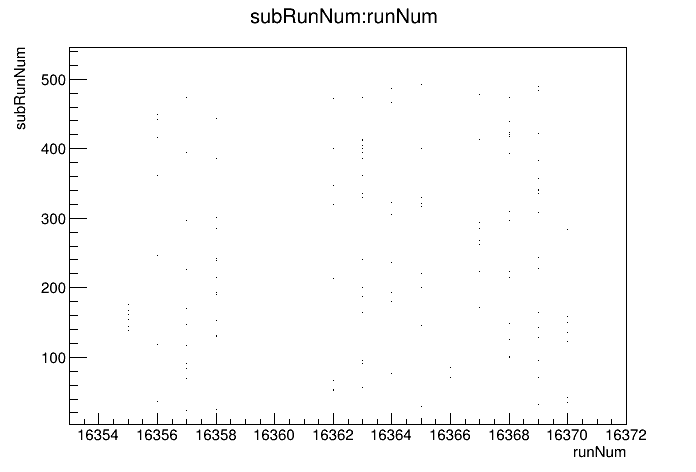

In [4]:
c = r.TCanvas()
t.Draw("subRunNum:runNum")
c.Draw()

This file contains aroot TTree in which the data for the clusters is stored. Associated with each cluster is a mean energy, its reconstructed position within the calorimeter, and various other parameters. Lets see the position distribution of all of the clusters

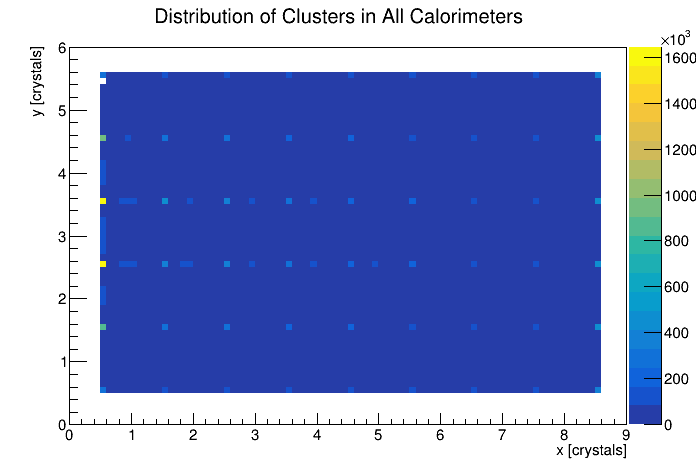

In [5]:
h1 = r.TH2D("h1","Distribution of Clusters in All Calorimeters; x [crystals]; y [crystals]",90,0,9,60,0,6)
c2 = r.TCanvas()
t.Draw("y:x>>h1")
h1.Draw("COLZ")
c2.Draw()

We can see that there is are some spots which are quite hot, but the real pattern starts to emerge when we view this on a log scale

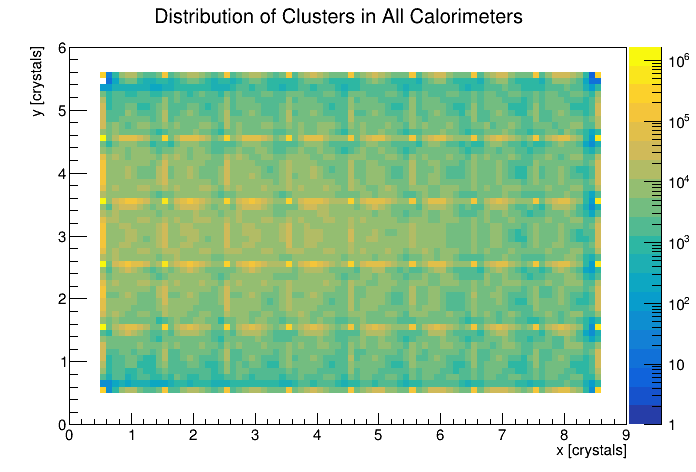

In [6]:
c2.SetLogz()
c2.Draw()

The reconstructed positions are very highly weighted towards the center of the crystals (the 0.5 marks) and are disfavored at the edges. We can also look and see the x and y-projections of this plot.

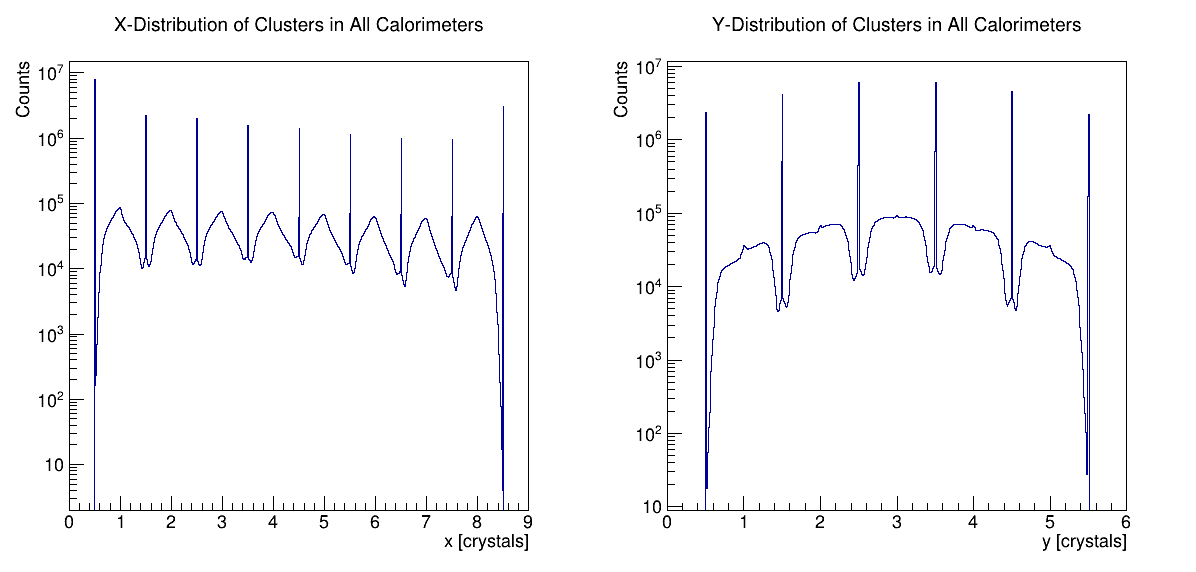

In [7]:
c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)

c3.cd(1)
r.gPad.SetLogy()
h2 = r.TH1D("h2","X-Distribution of Clusters in All Calorimeters; x [crystals]; Counts",900,0,9)
t.Draw("x>>h2","","goff")
h2.Draw()

c3.cd(2)
r.gPad.SetLogy()
h3 = r.TH1D("h3","Y-Distribution of Clusters in All Calorimeters; y [crystals]; Counts",600,0,6)
t.Draw("y>>h3","","goff")
h3.Draw()

c3.Draw()

Lets look at only one crystal

In [32]:
h4 = r.TH1D("h4","X-Distribution of Clusters in All Calorimeters; x [crystals]; Counts",200,2,3)
t.Draw("x>>h4","y > 2 && y< 3","goff")

12298353

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h4 (Potential memory leak).


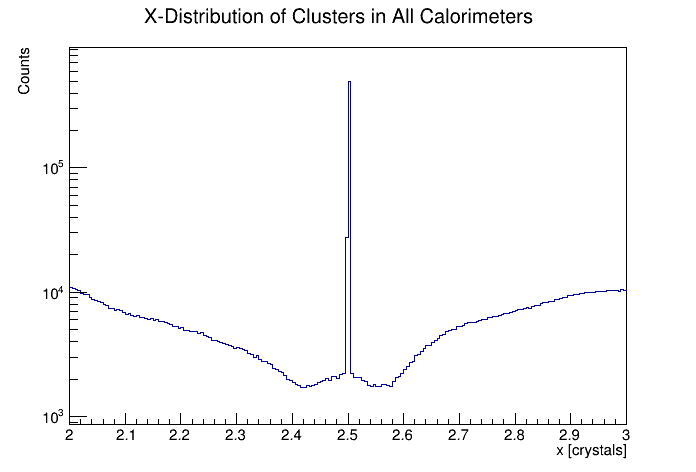

In [33]:
c4 = r.TCanvas()
h4.Draw()
c4.SetLogy()
c4.Draw()

Now for the real money plot, we have already generated a plot of the calorimeter data vs. time in order to extract the omega_a frequency

In [23]:
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

#lets also rescale the x-axis from clock ticks into (approximate) microseconds
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

<ROOT.TH1D object ("allCaloWiggle") at 0x7f27f45103b0>
0.0 560000.0
0.0 700.0


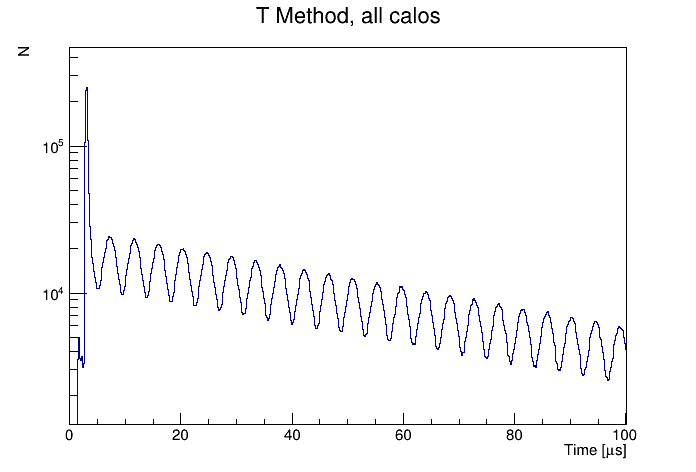

In [25]:
c2 = r.TCanvas()
allCaloWiggle.GetXaxis().SetRangeUser(0,100)
allCaloWiggle.Draw()
c2.SetLogy()
c2.Draw()

Lets perform a fourier transform on this plot and see what frequencies we can spot

Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


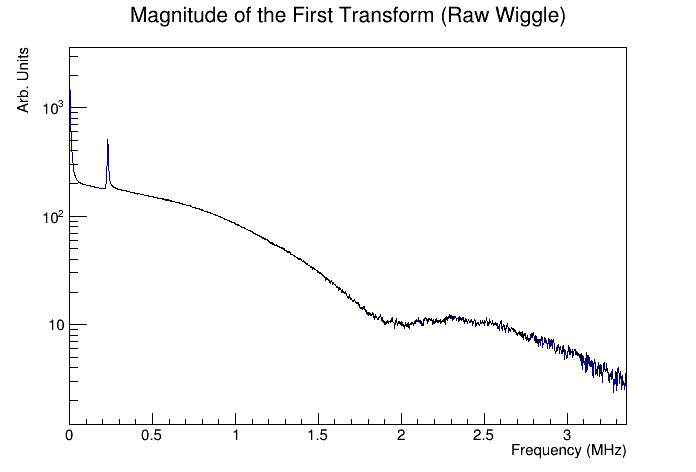

In [31]:
c5 = r.TCanvas()
hxformRaw = r.TH1D()
hxformRaw = 0
r.TVirtualFFT.SetTransform(0)
hxformRaw = allCaloWiggle.FFT(hxformRaw,"MAG P")
hxformRaw.SetTitle("Magnitude of the First Transform (Raw Wiggle)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxformRaw.GetEntries()
hxformRaw.Scale(1/normXform)
#c2.SetLogy()
hxformRaw.GetXaxis().SetTitle("Frequency (MHz)")
hxformRaw.GetYaxis().SetTitle("Arb. Units")
hxformRaw.Draw("HIST P0 L")

Npart = allCaloWiggle.GetSize() - 2
minBinCenter = allCaloWiggle.GetXaxis().GetBinCenter(0)
maxBinCenter = allCaloWiggle.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
#    print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
#    print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
#    print(limmax,limmaxMHz)
nbins = allCaloWiggle.GetSize() - 2

hxformRaw.SetBins(Npart,0,limmaxMHz)
hxformRaw.GetXaxis().SetRangeUser(0,limmaxMHz/2)

c5.SetLogy()

c5.Draw()

We can already see our target, but it is superimposed on a good deal of background noise (mostly the exponential decay, but there are other frequencies present as well)

In [3]:
df = read_root("./data/gm2offline_ana_10868087_16370.00284.root","farline/eventTree")#,flatten=['energy'])

In [4]:
df.head()

,runNum,subRunNum,eventNum,midasSerialNum,clockCounter,trigNum,bunchNum,runStartUnixTimeSeconds,ctag,caloNum,energy,time,x,y
0,16370,284,3,58022,2409.609451,58022,0,1525498849,239,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[89977.7073041866, 101.87287362488608, 222.534...","[-19395.76927145949, 2237.309179474737, 2242.7...","[4.458734232692782, 0.5, 3.4188590589589, 1.74...","[3.3363633469142724, 1.5, 1.979714764739725, 1..."
1,16370,284,7,58026,2409.629447,58026,2,1525498849,382,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[89106.24049169305, 132.74083422492572, 192.50...","[-19382.35144260338, 2237.4090215184942, 2244....","[4.267867893606318, 0.5, 3.5, 8.5, 0.850243236...","[3.3878638303533393, 1.5, 1.5, 4.5, 3.50320549..."
2,16370,284,9,58028,2409.639456,58028,3,1525498849,301,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[89799.63529988089, 166.4603654107443, 836.199...","[-19389.076601817676, 2240.196069766544, 2254....","[4.052760315837253, 3.5, 3.826535892095876, 0....","[3.299466993836355, 1.5, 2.122688090864464, 2...."
3,16370,284,11,58030,2409.649453,58030,4,1525498850,332,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[89860.73011597618, 315.2148851959325, 230.118...","[-19401.700385891094, 2244.8677473247194, 2251...","[4.220020517028314, 3.203730023812204, 7.45360...","[3.3670557318028047, 2.4999999999999996, 2.407..."
4,16370,284,13,58032,2409.659451,58032,5,1525498850,325,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[90493.54732965495, 133.95693836570237, 326.33...","[-19413.433284110397, 2253.998245961876, 2261....","[4.242635229972804, 0.5, 2.5451576049553024, 0...","[3.3486934437806264, 1.5, 5.011289401238826, 1..."


In [5]:
df.describe()

,runNum,subRunNum,eventNum,midasSerialNum,clockCounter,trigNum,bunchNum,runStartUnixTimeSeconds,ctag
count,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,11618.000000,1.161800e+04,11618.000000
mean,16363.450250,234.755896,108.137201,48176.122999,2331.612599,48176.122999,3.503615,1.525471e+09,277.166380
std,4.770102,142.347852,64.611602,29150.334719,1419.676248,29150.334719,2.291797,1.819730e+04,83.567374
min,16355.000000,3.000000,1.000000,600.000000,24.927871,600.000000,0.000000,1.525440e+09,0.000000
25%,16358.000000,123.000000,54.000000,25133.500000,1162.279086,25133.500000,2.000000,1.525453e+09,260.000000
50%,16364.000000,220.000000,107.000000,45764.500000,2219.615131,45764.500000,4.000000,1.525470e+09,300.000000
75%,16368.000000,357.000000,159.000000,72815.500000,3564.103566,72815.500000,6.000000,1.525489e+09,324.000000
max,16370.000000,493.000000,352.000000,106463.000000,5149.988328,106463.000000,7.000000,1.525499e+09,419.000000


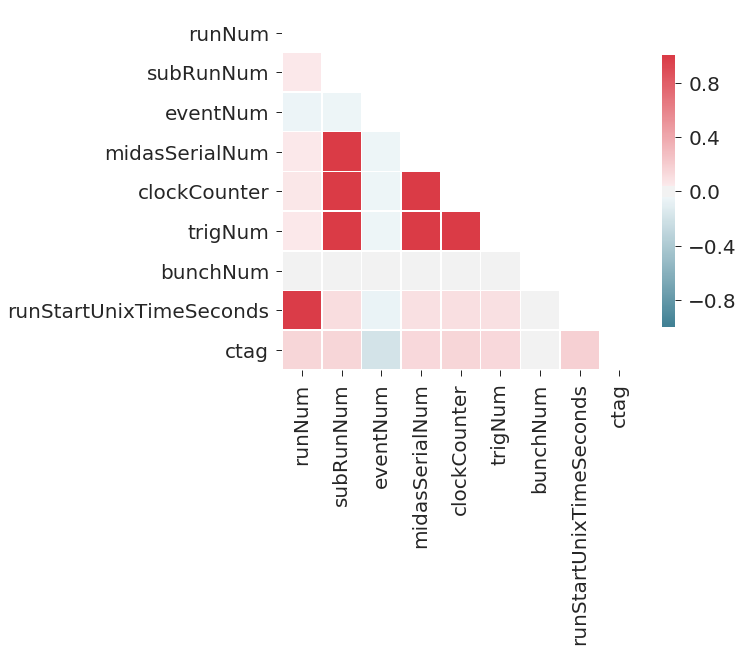

In [6]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)

plt.show()

In [7]:
file = uproot.open("./data/gm2offline_ana_10868087_16370.00284.root")

In [8]:
file.keys()

[b'farline;1']

In [9]:
tree = file["farline/eventTree"]

In [10]:
tree.keys()

[b'runNum',
 b'subRunNum',
 b'eventNum',
 b'midasSerialNum',
 b'clockCounter',
 b'trigNum',
 b'bunchNum',
 b'runStartUnixTimeSeconds',
 b'ctag',
 b'caloNum',
 b'energy',
 b'time',
 b'x',
 b'y']

In [11]:
arrX = tree["x"].array().flatten()
arrY = tree["y"].array().flatten()
arrEnergy = tree["energy"].array().flatten()
arrTime = tree["time"].array().flatten()
arrCaloNum = tree["caloNum"].array().flatten()

In [ ]:
dfUnpacked = pandas.DataFrame({'x':arrX,'y':arrY,'e':arrEnergy,'t':arrTime,"calo":arrCaloNum})
dfUnpacked.head()

In [ ]:
dfUnpacked.describe()